## explore_zillow

### Prepare environment

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# data acquire/prepare imports
import acquire_zillow as acq
import acquire_mall as acq_mall
import prepare_zillow as prep_z
import prepare_mall as prep_mall

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Initial look at raw data

In [4]:
df_zillow_total = acq.all_zillow_data()
df_zillow_total.head(3)

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemdesc,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusedesc,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storydesc,threequarterbathnbr,typeconstructiondesc,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,2016-01-01,0.03,11016594,Central,None,nan,2.00,3.00,None,4.00,2.00,nan,nan,"1,684.00","1,684.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,Central,"34,280,990.00","-118,488,536.00","7,528.00",nan,nan,nan,nan,nan,0100,Single Family Residential,LARS,"60,371,066.46","12,447.00","3,101.00","31,817.00","96,370.00",0.00,None,nan,None,1.00,nan,nan,"1,959.00",nan,nan,"122,754.00","360,170.00","2,015.00","237,416.00","6,735.88",None,nan,"60,371,066,461,001.00"
1,2016-01-01,-0.17,14366692,None,None,nan,3.50,4.00,None,nan,3.50,nan,nan,"2,263.00","2,263.00",nan,nan,nan,nan,"6,059.00",nan,3.00,2.00,468.00,nan,None,"33,668,120.00","-117,677,556.00","3,643.00",nan,nan,nan,nan,nan,1,Single Family Residential,None,"60,590,524.22","32,380.00","1,286.00",nan,"96,962.00",0.00,None,1.00,None,nan,nan,nan,"2,014.00",nan,nan,"346,458.00","585,529.00","2,015.00","239,071.00","10,153.02",None,nan,nan
2,2016-01-01,-0.00,12098116,Central,None,nan,3.00,2.00,None,4.00,3.00,nan,nan,"2,217.00","2,217.00",nan,nan,nan,nan,"6,037.00",nan,3.00,nan,nan,nan,Central,"34,136,312.00","-118,175,032.00","11,423.00",nan,nan,nan,nan,nan,0100,Single Family Residential,PSR6,"60,374,638.00","47,019.00","3,101.00","275,411.00","96,293.00",0.00,None,nan,None,1.00,nan,nan,"1,940.00",nan,nan,"61,994.00","119,906.00","2,015.00","57,912.00","11,484.48",None,nan,"60,374,638,003,004.00"


In [5]:
df_zillow_total.shape

(167854, 60)

### Apply prepare.py changes:

In [6]:
df_zillow_total = prep_z.data_prep(df_zillow_total)
df_zillow_total

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0
10,2016-01-03,0.38,10854446,2.00,2.00,"1,417.00",6037.0,"34,164,671.00","-118,477,995.00",0100,12447.0,3101.0,96426.0,1954.0,"105,954.00","1,443.69",60371414003003.0
11,2016-01-03,-0.02,11672170,4.00,5.00,"3,080.00",6037.0,"34,072,220.00","-118,547,322.00",0100,12447.0,3101.0,96120.0,1995.0,"1,090,127.00","13,428.94",60372626011017.0
12,2016-01-03,0.03,10949761,2.00,3.00,"1,484.00",6037.0,"34,189,804.00","-118,339,183.00",0100,396054.0,3101.0,96437.0,1944.0,"70,119.00",832.35,60373110001009.0
14,2016-01-03,-0.04,14148540,2.00,2.00,"1,367.00",6059.0,"33,913,333.00","-117,914,140.00",122,17150.0,1286.0,97035.0,1955.0,"254,817.00","3,192.28",60590015031046.0
15,2016-01-03,0.00,14057104,2.00,3.00,"1,302.00",6059.0,"33,676,787.00","-117,950,591.00",122,25218.0,1286.0,96964.0,1964.0,"345,023.00","4,036.32",60590992162013.0


In [7]:
df_zillow_total.shape

(110238, 17)

#### Maggies code for outliers... selects by column and lists the min and max boundaries to mark outliers.
#### Add this to the prepare.py... test it first!

In [8]:
keys = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet']
values = [(1,7), (1,7), (500,8000), (25000,2000000), (10000,2500000)]

dictionary = dict(zip(keys, values))

for key, value in dictionary.items():
    df_zillow_total = df_zillow_total[df_zillow_total[key] >= value[0]]
    df_zillow_total = df_zillow_total[df_zillow_total[key] <= value[1]]

In [ ]:
df_zillow_total.shape

#### Now, create dummy columns on the FIPS (county identifier)

In [9]:
#create dummy columns on the FIPS
dummy = pd.get_dummies(df_zillow_total['fips'],prefix='fips')
df_zillow_total = pd.concat([df_zillow_total, dummy], axis=1)
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0,1,0,0
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0,1,0,0
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0,0,1,0
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0,1,0,0
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0,1,0,0


In [10]:
df_zillow_total.shape

(109630, 20)

In [11]:
fips_codes = ['fips_6037.0','fips_6059.0','fips_6111.0']
df_zillow_total[fips_codes].sum()

fips_6037.0    70689
fips_6059.0    29750
fips_6111.0     9191
dtype: int64

In [12]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0'], dtype='object')

#### Now, create an 'age' field by calculating against the 'yearbuilt' column:

In [15]:
df_zillow_total['age'] = 2017 - df_zillow_total.yearbuilt.astype(float)
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0,1,0,0,58.00
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0,1,0,0,77.00
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0,0,1,0,36.00
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0,1,0,0,35.00
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0,1,0,0,78.00


#### Now, peek at the newly prepared df:

In [ ]:
look_zillow = prep_z.peekatdata(df_zillow_total)

In [ ]:
df_zillow_total.describe(include='all')

In [ ]:
df_zillow_total.shape

In [ ]:
#prep_z.check_missing_values_col(df_zillow_total)

In [16]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age'], dtype='object')

#### Now, scale the relevant numerical columns, ignoring other numerical columns that are essentially categorical in nature:

In [19]:
scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['logerror']])
df_zillow_total.logerror = scaler.transform(df_zillow_total[['logerror']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['bathroomcnt']])
df_zillow_total.bathroomcnt = scaler.transform(df_zillow_total[['bathroomcnt']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['bedroomcnt']])
df_zillow_total.bedroomcnt = scaler.transform(df_zillow_total[['bedroomcnt']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['calculatedfinishedsquarefeet']])
df_zillow_total.calculatedfinishedsquarefeet = scaler.transform(df_zillow_total[['calculatedfinishedsquarefeet']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['taxvaluedollarcnt']])
df_zillow_total.taxvaluedollarcnt = scaler.transform(df_zillow_total[['taxvaluedollarcnt']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['taxamount']])
df_zillow_total.taxamount = scaler.transform(df_zillow_total[['taxamount']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['latitude']])
df_zillow_total.latitude = scaler.transform(df_zillow_total[['latitude']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['longitude']])
df_zillow_total.longitude = scaler.transform(df_zillow_total[['longitude']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['age']])
df_zillow_total.age = scaler.transform(df_zillow_total[['age']])

In [18]:
# scaler = MinMaxScaler()
# num_vars = list(df_zillow_total.select_dtypes('number').drop(columns=['propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0']))

# print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
# df_zillow_total[num_vars] = scaler.fit_transform(df_zillow_total[num_vars])

In [22]:
df_zillow_total.shape

(109630, 21)

In [20]:
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
0,2016-01-01,0.51,11016594,0.17,0.33,0.16,6037.0,0.64,0.52,0100,12447.0,3101.0,96370.0,1959.0,0.01,0.02,60371066461001.0,1,0,0,0.41
2,2016-01-01,0.51,12098116,0.33,0.17,0.23,6037.0,0.54,0.68,0100,47019.0,3101.0,96293.0,1940.0,0.00,0.04,60374638003004.0,1,0,0,0.55
4,2016-01-02,0.51,14432541,0.25,0.50,0.24,6059.0,0.10,0.93,122,17686.0,1286.0,96961.0,1981.0,0.02,0.02,60590423381006.0,0,1,0,0.25
5,2016-01-02,0.48,11509835,0.50,0.50,0.34,6037.0,0.36,0.56,0100,29712.0,3101.0,96109.0,1982.0,0.10,0.09,60376210044006.0,1,0,0,0.25
6,2016-01-02,0.51,12286022,0.00,0.17,0.11,6037.0,0.38,0.66,0100,24174.0,3101.0,96091.0,1939.0,0.00,0.01,60375416053007.0,1,0,0,0.56


In [23]:
df_zillow_total.describe(include='all')

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
count,109630,"109,630.00",109630,"109,630.00","109,630.00","109,630.00",109630,"109,630.00","109,630.00",109630,109630,109630,109630,109630,"109,630.00","109,630.00",109630,"109,630.00","109,630.00","109,630.00","109,630.00"
unique,607,nan,107825,nan,nan,nan,3,nan,nan,23,177,3,378,135,nan,nan,47019,nan,nan,nan,nan
top,2017-06-30,nan,12478591,nan,nan,nan,6037.0,nan,nan,0100,12447.0,3101.0,97319.0,1955.0,nan,nan,60590320231024.0,nan,nan,nan,nan
freq,787,nan,3,nan,nan,nan,70689,nan,nan,56192,24133,70689,1626,4001,nan,nan,55,nan,nan,nan,nan
mean,NaN,0.51,NaN,0.21,0.38,0.19,NaN,0.46,0.67,NaN,NaN,NaN,NaN,NaN,0.02,0.02,NaN,0.64,0.27,0.08,0.39
std,NaN,0.02,NaN,0.16,0.15,0.12,NaN,0.18,0.19,NaN,NaN,NaN,NaN,NaN,0.02,0.02,NaN,0.48,0.44,0.28,0.17
min,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00
25%,NaN,0.50,NaN,0.17,0.33,0.10,NaN,0.33,0.57,NaN,NaN,NaN,NaN,NaN,0.01,0.01,NaN,0.00,0.00,0.00,0.28
50%,NaN,0.51,NaN,0.17,0.33,0.15,NaN,0.46,0.70,NaN,NaN,NaN,NaN,NaN,0.01,0.02,NaN,1.00,0.00,0.00,0.41
75%,NaN,0.51,NaN,0.33,0.50,0.24,NaN,0.57,0.81,NaN,NaN,NaN,NaN,NaN,0.02,0.02,NaN,1.00,1.00,0.00,0.48


#### View the distribution of the numeric variables

Plot a histogram of each variable.

Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

#### Histograms of all variables in dataframe:

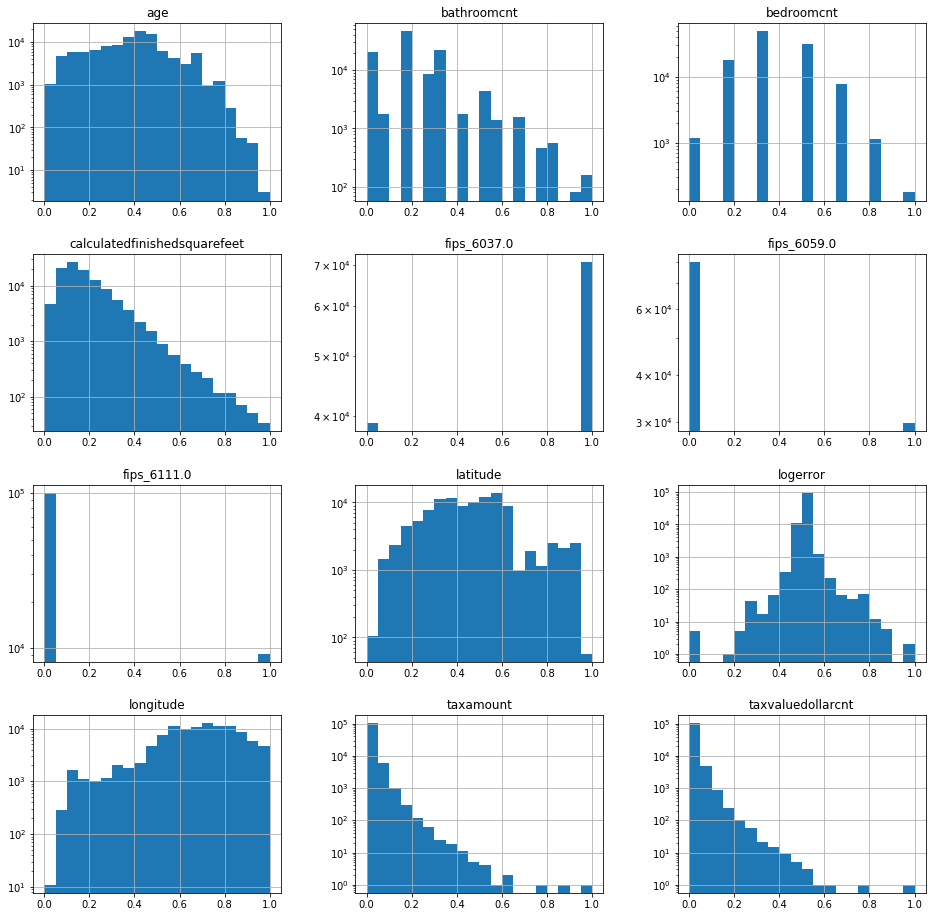

In [24]:
def zillow_hist(df):
    df_zillow_total.hist(figsize=(16,16), bins=20, log=True)
    plt.show()

zillow_hist(df_zillow_total)

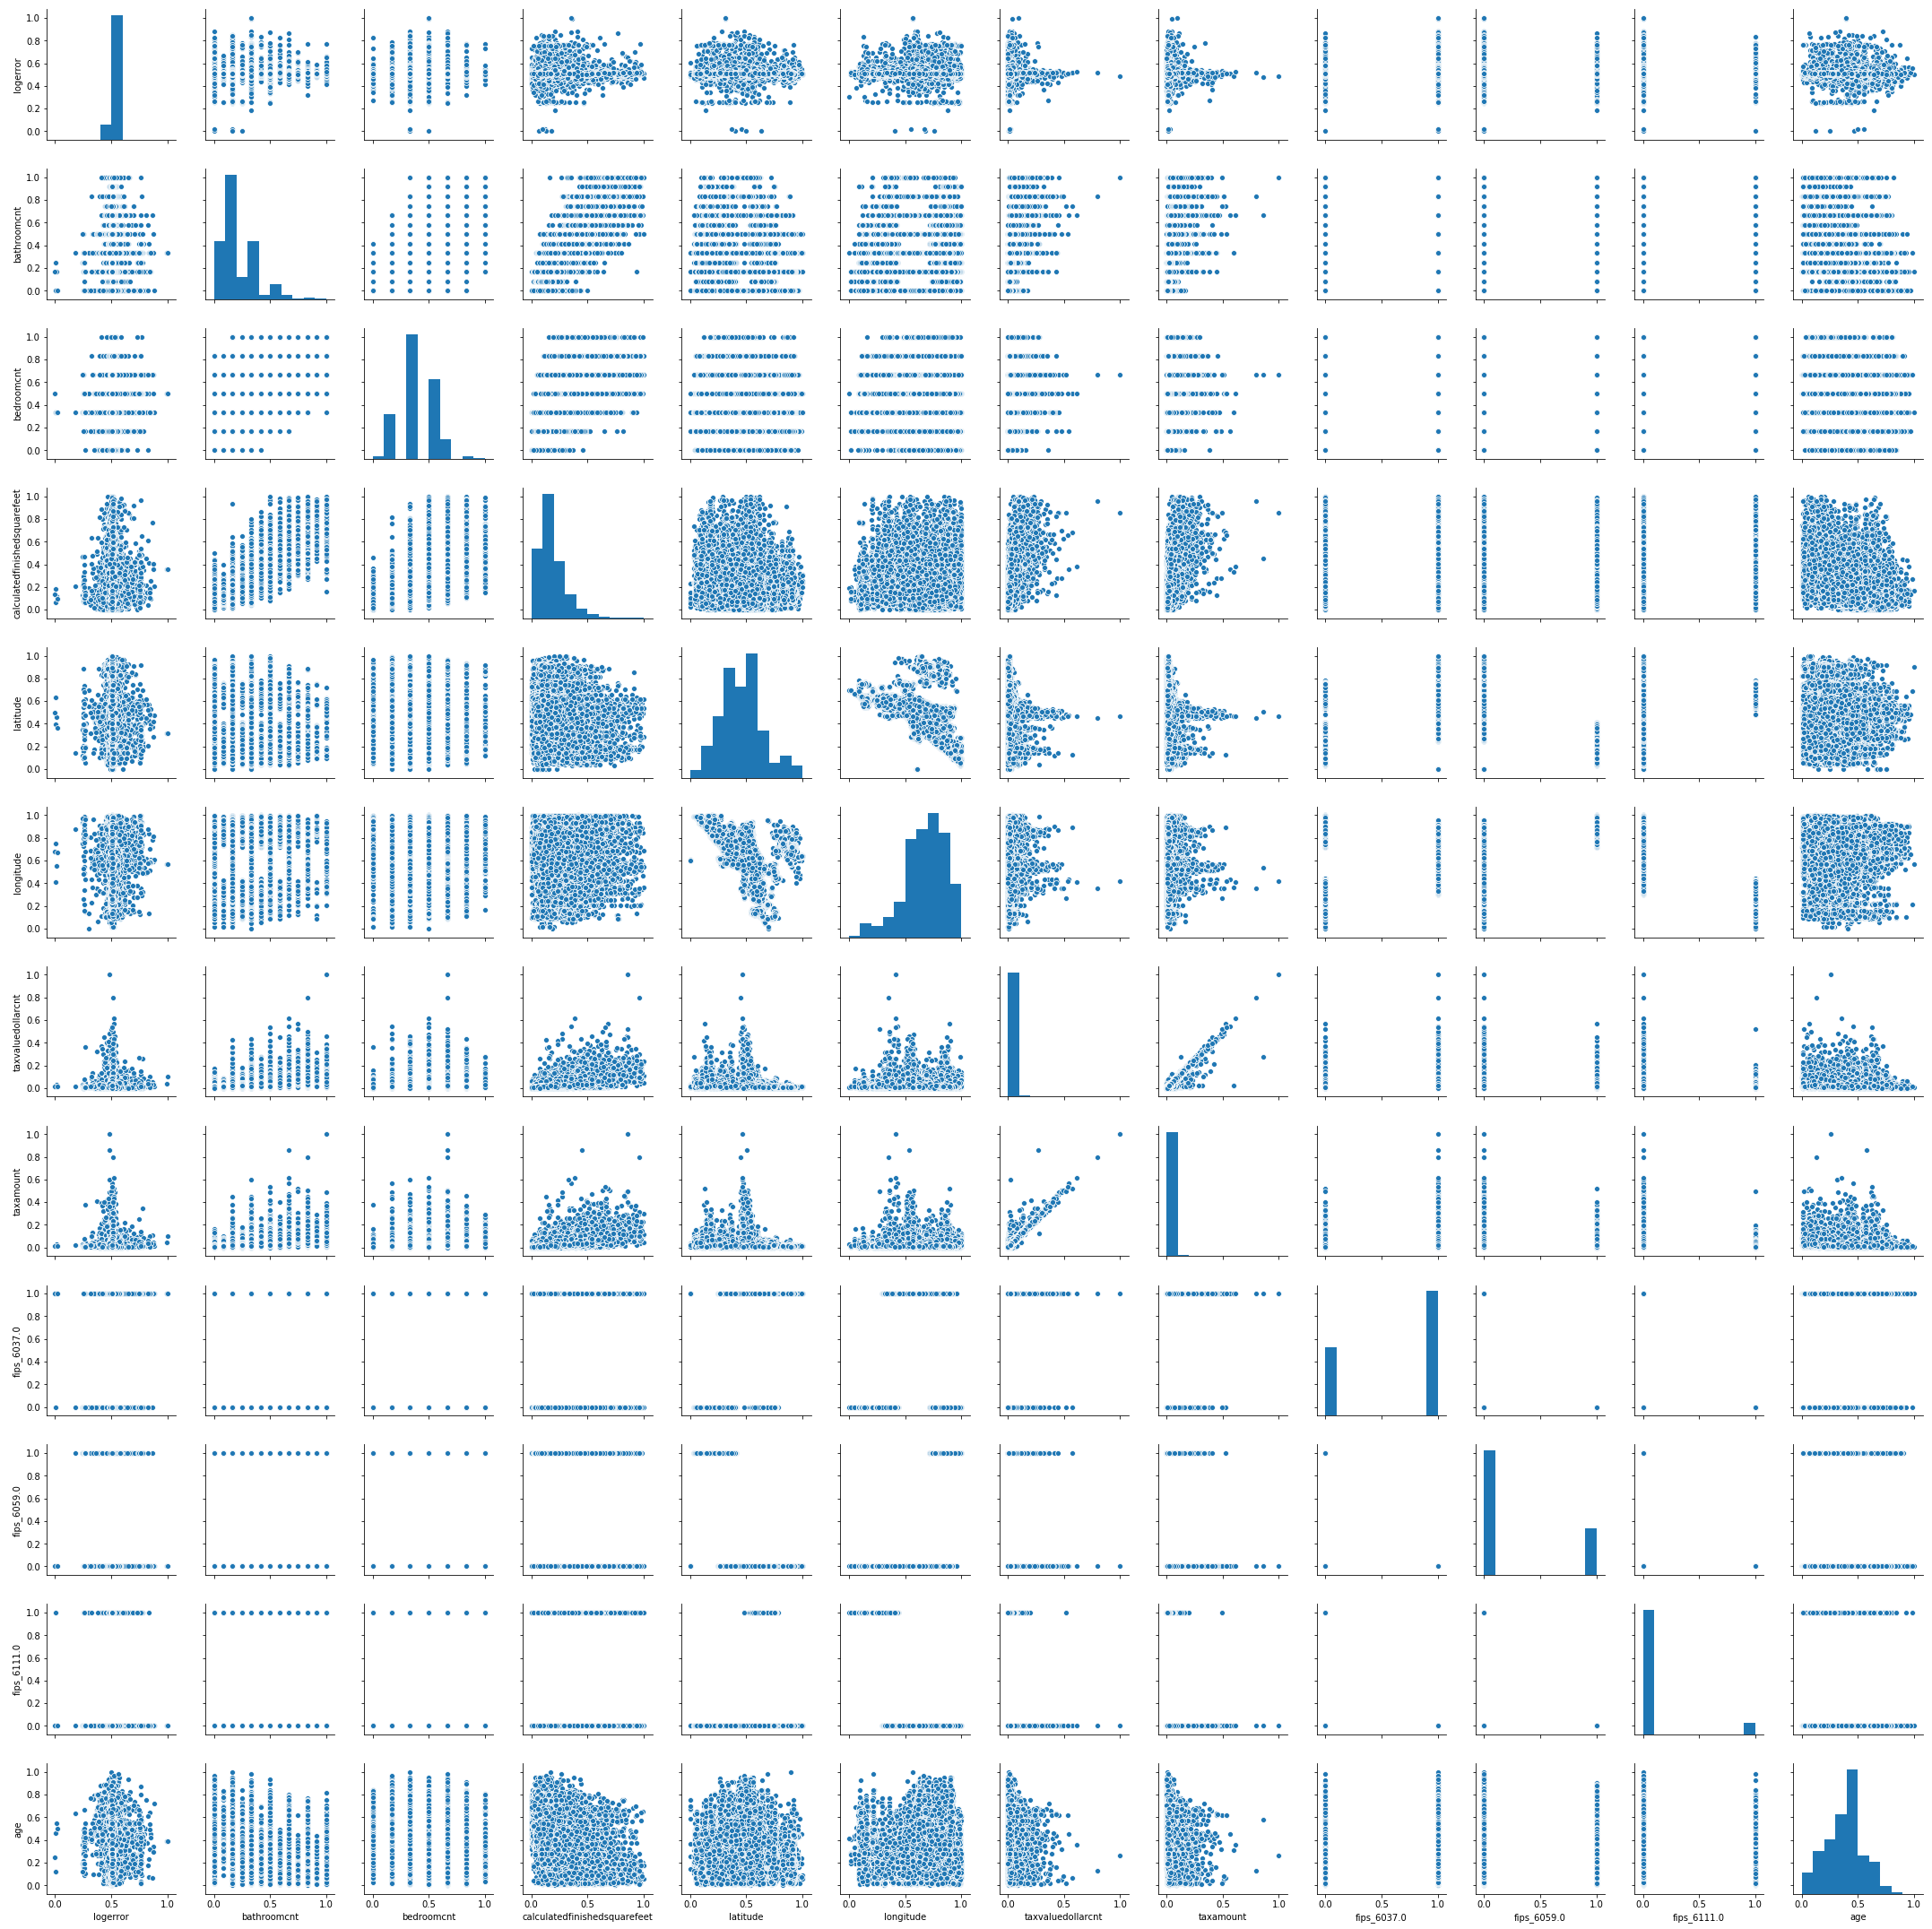

In [28]:
import seaborn as sns

def zillow_pair(df):
    sns.pairplot(df_zillow_total.select_dtypes('number'))


# def zillow_pair(df):
#     sns.pairplot(df_zillow_total.select_dtypes('number').drop(columns=['latitude', 'longitude']))

zillow_pair(df_zillow_total)

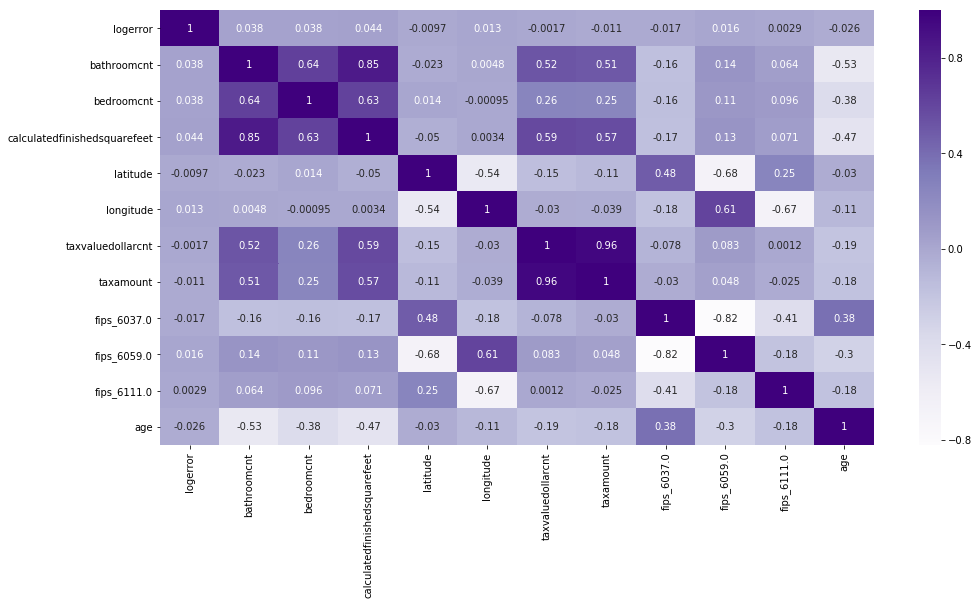

In [29]:
def zillow_heat(df):
    plt.figure(figsize=(16,8))
    sns.heatmap(df.corr(), cmap='Purples', annot=True)

zillow_heat(df_zillow_total)

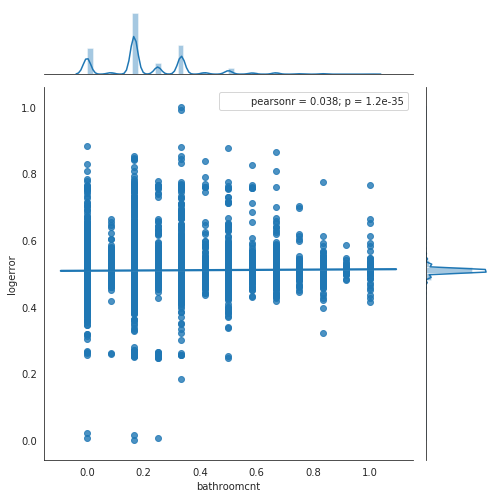

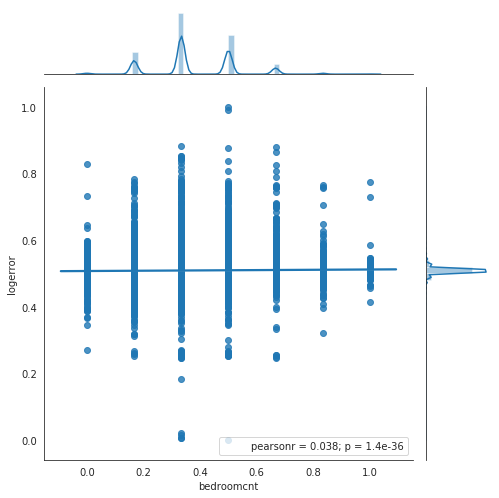

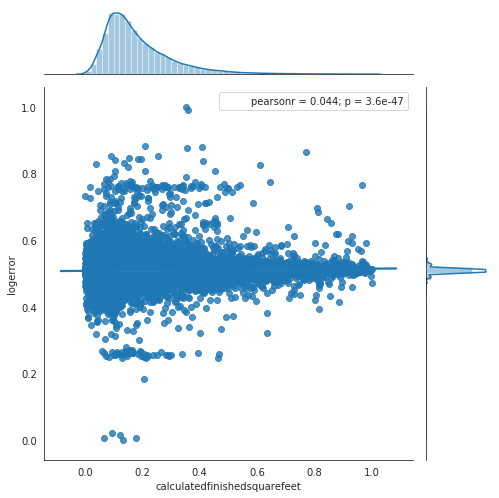

In [30]:
def zillow_joint(df):
    for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']):
        with sns.axes_style('white'):
            plot_number = i + 1
            series = df[col]
            j = sns.jointplot(df[col], 'logerror', data=df, kind='reg', height=7)
            j.annotate(stats.pearsonr)
    plt.show

zillow_joint(df_zillow_total)

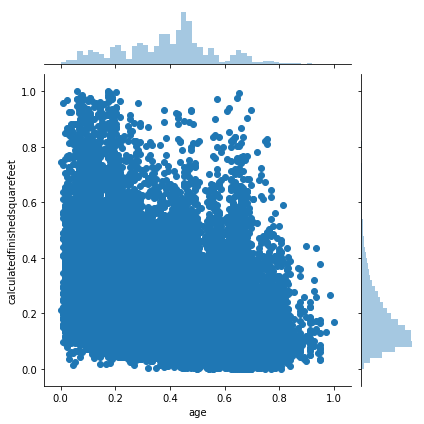

In [77]:
def zillow_sq_ft_age(df):
    sns.jointplot(x="age", y="calculatedfinishedsquarefeet", data=df_zillow_total)
    plt.show
    
zillow_sq_ft_age(df_zillow_total)

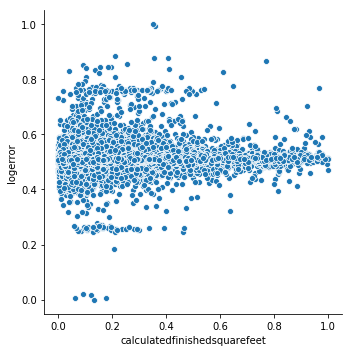

In [78]:
def zillow_sq_ft_error(df):
    sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=df_zillow_total)
    plt.show
    
zillow_sq_ft_error(df_zillow_total)

### Clustering

Clustering with logerror only:

In [32]:
X = df_zillow_total[['logerror']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

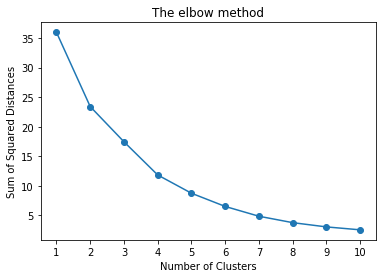

In [33]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

This means that things flatten out at about 4 clusters.  Use 4 clusters going forward.

Another elbow method looking at a cluster of sq ft and tax valuation.

In [69]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 15):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 15), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

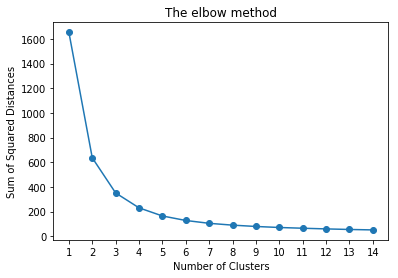

In [70]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 15))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

#### Another cluster, done manually

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

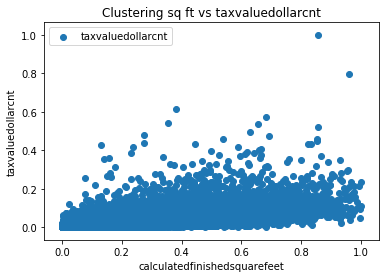

In [34]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
plt.scatter(X.calculatedfinishedsquarefeet, X.taxvaluedollarcnt)
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Setting the starting points for the clusters to center around.  These are the 'centers.'

In [37]:
starting_points = [(.2, .2), (.4, .2), (.6, .4), (.8, .6)]

centers = pd.DataFrame(starting_points, columns=['calculatedfinishedsquarefeet', 'taxvaluedollarcnt'])
centers

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0.20,0.20
1,0.40,0.20
2,0.60,0.40
3,0.80,0.60


Now adding the cluster marks on the scatter plot

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

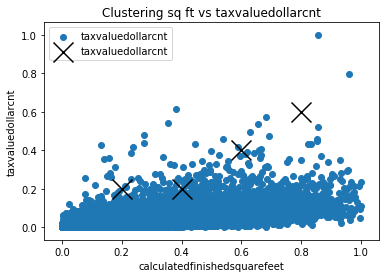

In [38]:
plt.scatter(X.calculatedfinishedsquarefeet, X.taxvaluedollarcnt)
plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, marker='x', s=400, c='black')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Calculating distances, and returning nearest center for each point

In [39]:
# ======================================================================== #
# Note this doesn't print anything to the screen. Move on to the next cell.
# ======================================================================== #

def distance(x, y):
    '''distance between x and y'''
    return math.sqrt((x.calculatedfinishedsquarefeet - y.calculatedfinishedsquarefeet)**2 +
                     (x.taxvaluedollarcnt - y.taxvaluedollarcnt)**2)
    
def find_cluster(row: pd.Series):
    '''takes a data point, and returns the nearest center'''
    distances = centers.apply(lambda center: distance(center, row), axis=1)
    return distances.idxmin()


# ======================================================================== #
# Note this doesn't print anything to the screen. Move on to the next cell.
# ======================================================================== #

In [40]:
X['cluster'] = X.apply(find_cluster, axis=1)
X.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,cluster
0,0.16,0.01,0
2,0.23,0.00,0
4,0.24,0.02,0
5,0.34,0.10,1
6,0.11,0.00,0


Counts of the data points in relation to the chosen four (4) centers.

In [41]:
X.cluster.value_counts()

0    94100
1    14924
2      589
3       17
Name: cluster, dtype: int64

Now plotting that in color:

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

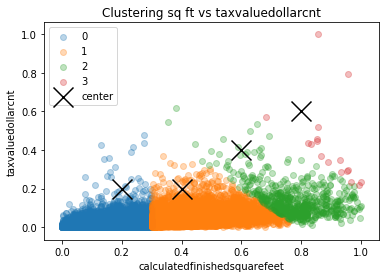

In [42]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Now RE-center the centers of the clusters, based on mean:

In [43]:
centers = X.groupby('cluster').mean()

Now RE-adjusting the clusters based on the new mean-based centers:

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

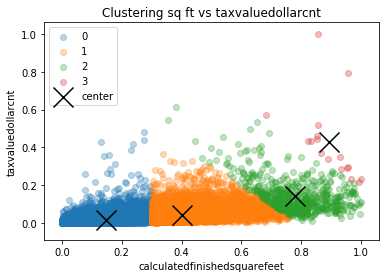

In [45]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Now, repeating this process multiple times, to re-center the center of clusters, and then readjusting the clusters around the new centers.

In [46]:
centers = X.groupby('cluster').mean()

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

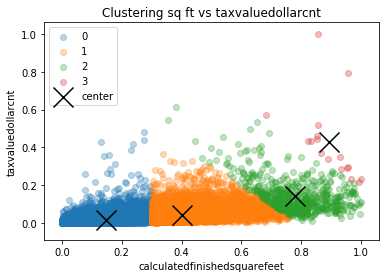

In [47]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

In [48]:
centers = X.groupby('cluster').mean()

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

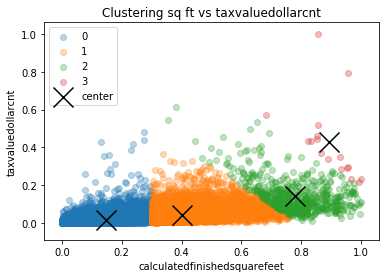

In [49]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

In [50]:
centers = X.groupby('cluster').mean()

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

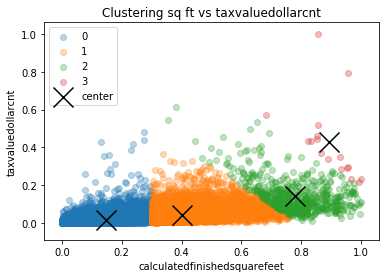

In [51]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

That was all manual.  Now, this process is done automatically, using:

In [53]:
from sklearn.cluster import KMeans

The X below is a df based on just the log error field.

The KMeans object is created, and that df is split into 4 clusters. Those clusters are fit to KMeans model.

A new field is created in the df based on the KMeans prediction of those clusters.

Finally, the primary df is ploted in a relplot, specifically, the two fields shown as x and y, with respect to those clusters.  This looks at the correlation of the two fields with respect to the clusters, in this case the logerror.

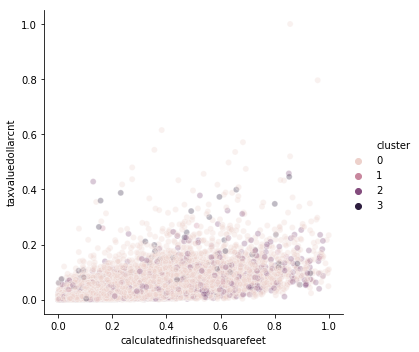

In [55]:
X = df_zillow_total[['logerror']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', hue='cluster', alpha=.3)

Another clustering, this time using sq ft and tax valuation, looking at correlation of tax valuation and sq ft.

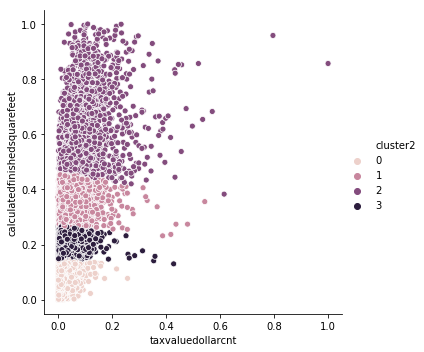

In [56]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster2'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='taxvaluedollarcnt', y='calculatedfinishedsquarefeet', hue='cluster2')

In [62]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
#pd.DataFrame(kmeans.cluster_centers_, columns=X.drop(columns='cluster2').columns)

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0.10,0.01
1,0.33,0.03
2,0.58,0.08
3,0.20,0.02


In [63]:
kmeans.inertia_

229.813471162968

In [61]:
X.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0.16,0.01
2,0.23,0.00
4,0.24,0.02
5,0.34,0.10
6,0.11,0.00


Another cluster, based on sq ft and tax valuation, looking at correlation of bathroomcnt and logerror.

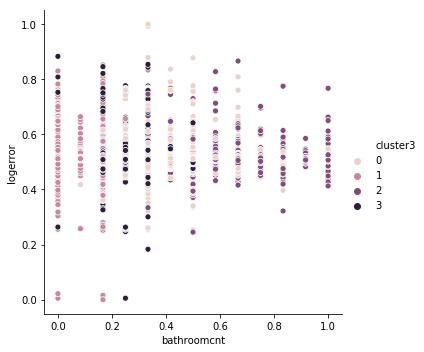

In [66]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster3'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='bathroomcnt', y='logerror', hue='cluster3')

Another cluster, build on sq ft and tax valuation, looking at age and logerror.

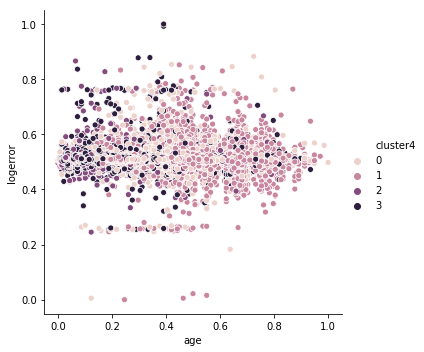

In [67]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster4'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='age', y='logerror', hue='cluster4')

Another cluster, using lat and long, considering correlation of age and tax valuation:

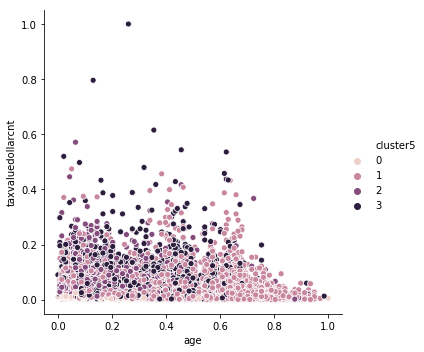

In [109]:
X = df_zillow_total[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster5'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='age', y='taxvaluedollarcnt', hue='cluster5')

In [123]:
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5
0,2016-01-01,0.51,11016594,0.17,0.33,0.16,6037.0,0.64,0.52,0100,12447.0,3101.0,96370.0,1959.0,0.01,0.02,60371066461001.0,1,0,0,0.41,0,3,3,0,3
2,2016-01-01,0.51,12098116,0.33,0.17,0.23,6037.0,0.54,0.68,0100,47019.0,3101.0,96293.0,1940.0,0.00,0.04,60374638003004.0,1,0,0,0.55,0,3,3,0,1
4,2016-01-02,0.51,14432541,0.25,0.50,0.24,6059.0,0.10,0.93,122,17686.0,1286.0,96961.0,1981.0,0.02,0.02,60590423381006.0,0,1,0,0.25,0,3,3,0,2
5,2016-01-02,0.48,11509835,0.50,0.50,0.34,6037.0,0.36,0.56,0100,29712.0,3101.0,96109.0,1982.0,0.10,0.09,60376210044006.0,1,0,0,0.25,0,1,0,3,1
6,2016-01-02,0.51,12286022,0.00,0.17,0.11,6037.0,0.38,0.66,0100,24174.0,3101.0,96091.0,1939.0,0.00,0.01,60375416053007.0,1,0,0,0.56,0,0,1,1,1


#### Perform at least 1 t-test and 1 chi square test.

Personal note re R^2:

Need:

R^2 greater than .5;  -  ie in one example, "92.1% of the variance in dependent variable is explained by the independent variable."



Also re Pearson's R:  "Pearson's R is __ with a significance p-value of __"


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

In [86]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5'], dtype='object')

In [183]:
pd.crosstab(df_zillow_total["regionidcounty"], df_zillow_total["fips"], margins=True)

KeyError: 'regionidcounty'

In [93]:
tbl = pd.crosstab(df_zillow_total["regionidcounty"], df_zillow_total["fips"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Dependent (reject H0)
0.0


In [182]:
pd.crosstab(df_zillow_total["cluster4"], df_zillow_total["fips"], margins=True)

KeyError: 'fips'

In [93]:
tbl = pd.crosstab(df_zillow_total["yearbuilt"], df_zillow_total["fips"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Dependent (reject H0)
0.0


pearson's r

In [108]:
r, pval = stats.pearsonr(df_zillow_total.latitude, df_zillow_total.bathroomcnt)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: -0.02274520994892579, P-Value: 4.999833690673619e-14


In [130]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.bedroomcnt)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.03813182372889639, P-Value: 1.441744498351118e-36


In [131]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.calculatedfinishedsquarefeet)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.043546743503927794, P-Value: 3.592878696361112e-47


In [133]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.age)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: -0.02565878055065483, P-Value: 1.9449932582643032e-17


In [134]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.latitude)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: -0.00965789974352998, P-Value: 0.0013847577032535478


In [135]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.longitude)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.01346290257111289, P-Value: 8.281478254554402e-06


t-tests

In [136]:
stats.ttest_ind(
    df_zillow_total[df_zillow_total.cluster2 == 2].logerror.dropna(),
    df_zillow_total[df_zillow_total.cluster2 == 1].logerror.dropna())

Ttest_indResult(statistic=4.947011239531475, pvalue=7.593600968788842e-07)

In [100]:
stats.ttest_ind(
    df_zillow_total[df_zillow_total.fips == '6037.0'].logerror.dropna(),
    df_zillow_total[df_zillow_total.fips == '6059.0'].logerror.dropna())

Ttest_indResult(statistic=-5.585267394607456, pvalue=2.339425513735809e-08)

In [119]:
stats.ttest_ind(df_zillow_total[df_zillow_total.bedroomcnt > .5].logerror.dropna(),
               df_zillow_total[df_zillow_total.bedroomcnt <= .3].logerror.dropna())

Ttest_indResult(statistic=10.678410002287501, pvalue=1.4443151633073616e-26)

In [116]:
# how to slice into a variable and compare different pieces/measurements of it against other pieces/chunks of it.

three_br = df_zillow_total[df_zillow_total.bedroomcnt > .9]
five_br = df_zillow_total[df_zillow_total.bedroomcnt <= .2]

from scipy.stats import ttest_ind
ttest_ind(three_br.logerror, five_br.logerror)

Ttest_indResult(statistic=3.6358683059418904, pvalue=0.00027777453406078583)

In [121]:
lt_200k = df_zillow_total[df_zillow_total.taxvaluedollarcnt <= .2]
gt_200k = df_zillow_total[df_zillow_total.taxvaluedollarcnt > .5]

from scipy.stats import ttest_ind
ttest_ind(lt_200k.logerror, gt_200k.logerror)

Ttest_indResult(statistic=0.05584644921278735, pvalue=0.9554642335038506)

In [118]:
avg_am_new_home = df_zillow_total[df_zillow_total.calculatedfinishedsquarefeet <= .2]
gt_avg_am_new_home = df_zillow_total[df_zillow_total.calculatedfinishedsquarefeet > .2]

from scipy.stats import ttest_ind
ttest_ind(avg_am_new_home.logerror, gt_avg_am_new_home.logerror)

Ttest_indResult(statistic=-10.483353664241335, pvalue=1.0595226090035913e-25)

#### Restricting the dataframe to only show the following variables:

In [161]:
df_zillow_total = df_zillow_total[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age',
 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror']]

In [166]:
df_zillow_total.sample(5)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,taxvaluedollarcnt,taxamount,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5,logerror
148079,0.33,0.50,0.29,0.33,0.68,0.03,0.03,1,0,0,0.54,0,1,0,3,1,0.50
125846,0.33,0.33,0.20,0.51,0.72,0.00,0.01,1,0,0,0.37,0,3,3,0,1,0.50
93304,0.17,0.33,0.20,0.57,0.29,0.01,0.01,0,0,1,0.28,0,3,3,0,3,0.51
23384,0.00,0.33,0.11,0.34,0.72,0.00,0.00,1,0,0,0.48,0,0,1,1,1,0.51
51201,0.00,0.17,0.05,0.36,0.60,0.00,0.00,1,0,0,0.49,0,0,1,1,1,0.51


### Modeling

Train, test split:

In [172]:
X = df_zillow_total.drop(['logerror'], axis=1)
y = df_zillow_total[['logerror']]

X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,taxvaluedollarcnt,taxamount,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5
0,0.17,0.33,0.16,0.64,0.52,0.01,0.02,1,0,0,0.41,0,3,3,0,3
2,0.33,0.17,0.23,0.54,0.68,0.00,0.04,1,0,0,0.55,0,3,3,0,1
4,0.25,0.50,0.24,0.10,0.93,0.02,0.02,0,1,0,0.25,0,3,3,0,2
5,0.50,0.50,0.34,0.36,0.56,0.10,0.09,1,0,0,0.25,0,1,0,3,1
6,0.00,0.17,0.11,0.38,0.66,0.00,0.01,1,0,0,0.56,0,0,1,1,1


In [171]:
y.head()

,logerror
0,0.51
2,0.51
4,0.51
5,0.48
6,0.51


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror']
Train dimensions (rows, columns): (76741, 17)


Test columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror']
Test dimensions (rows, columns): (32889, 17)


In [174]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.70
Test Split: 0.30


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

Test of this plot with a single variable:

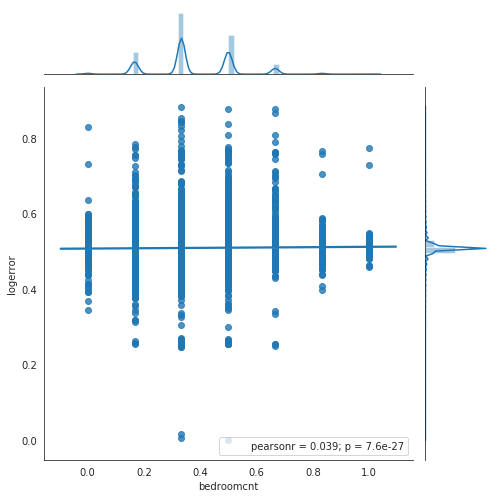

In [176]:
with sns.axes_style('white'):
    j = sns.jointplot('bedroomcnt', 'logerror', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

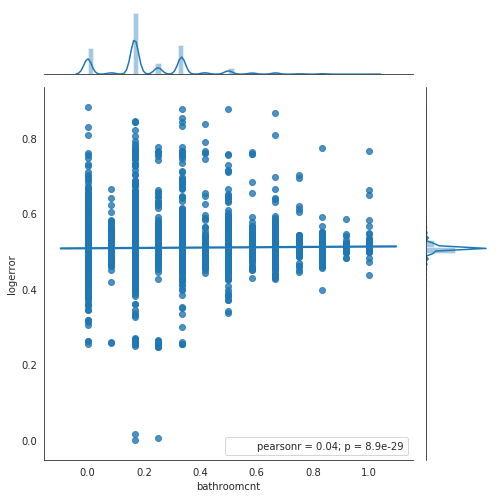

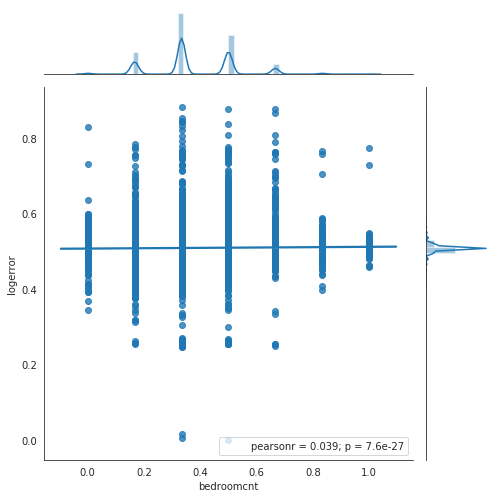

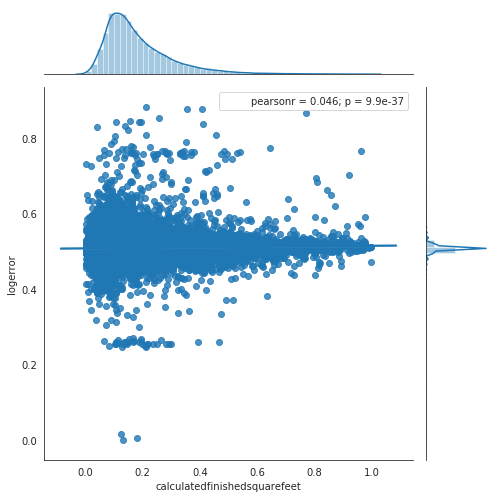

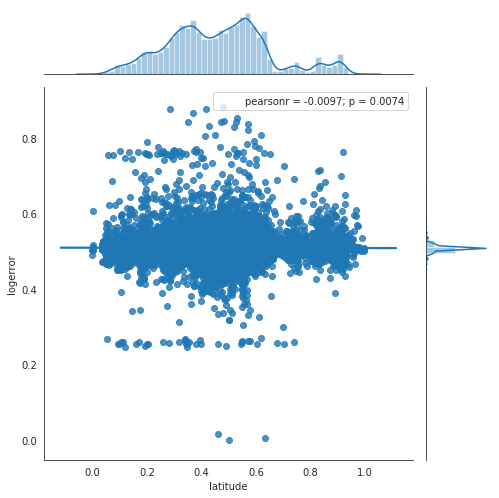

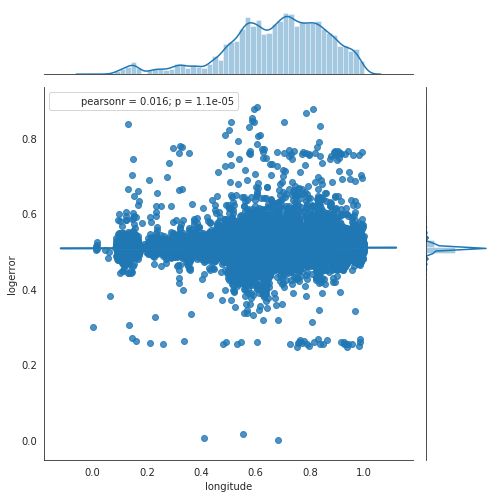

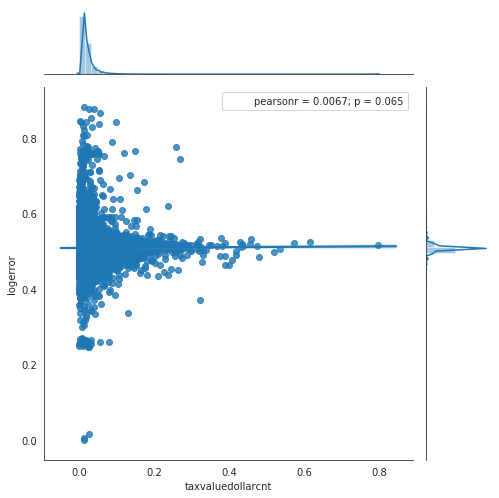

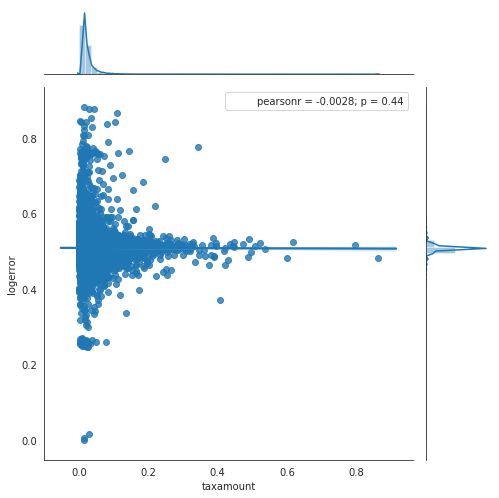

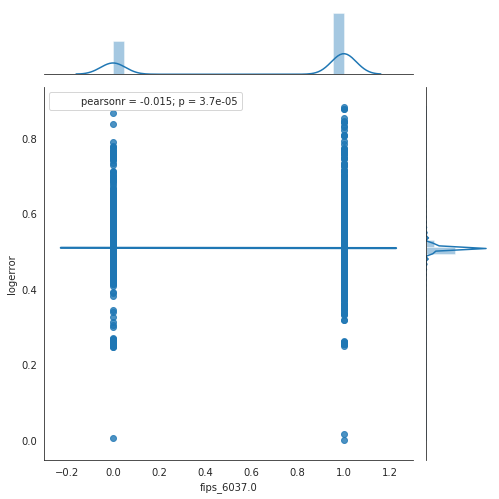

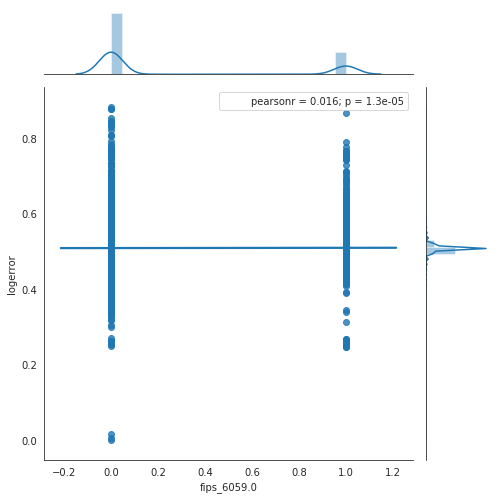

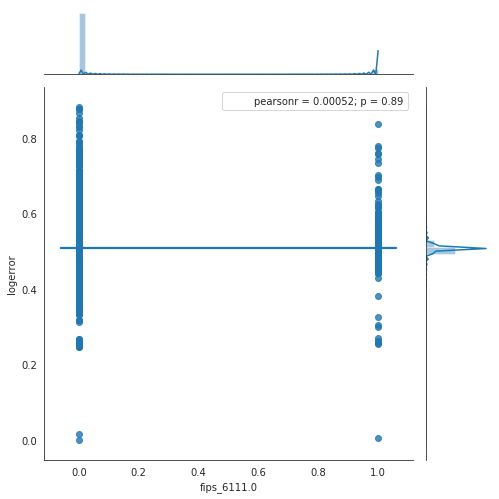

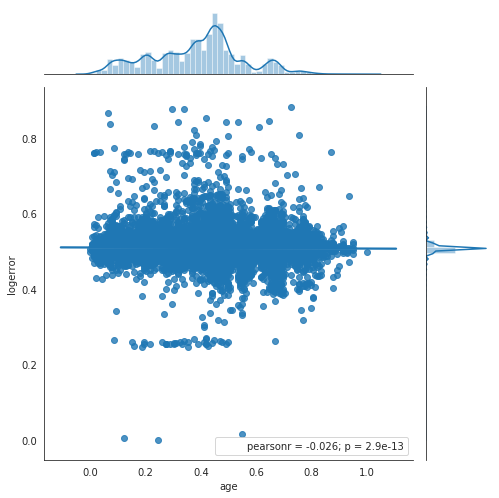

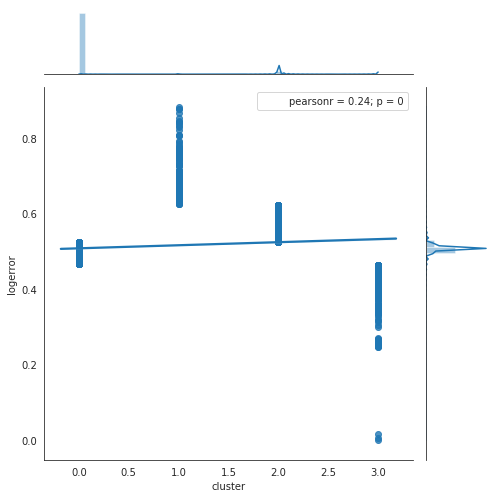

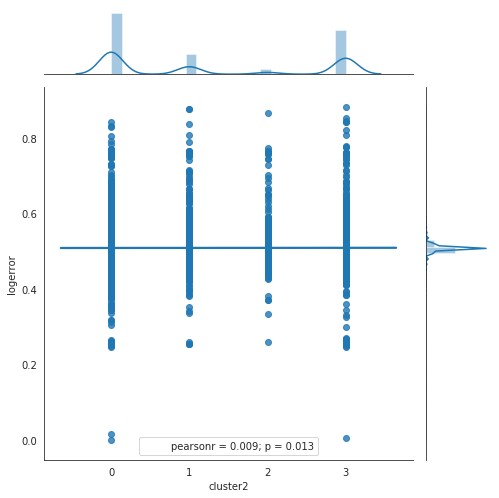

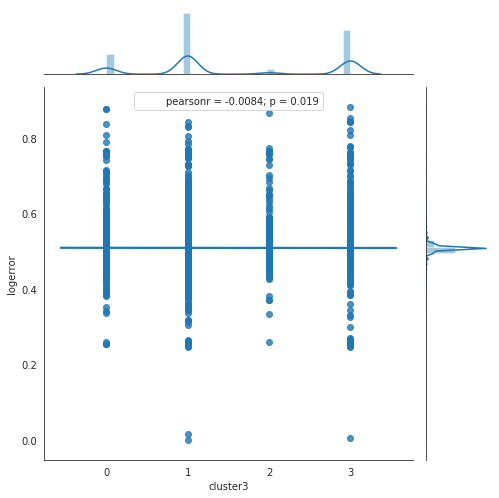

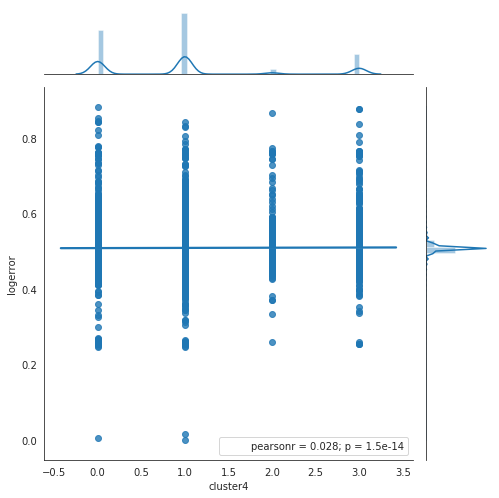

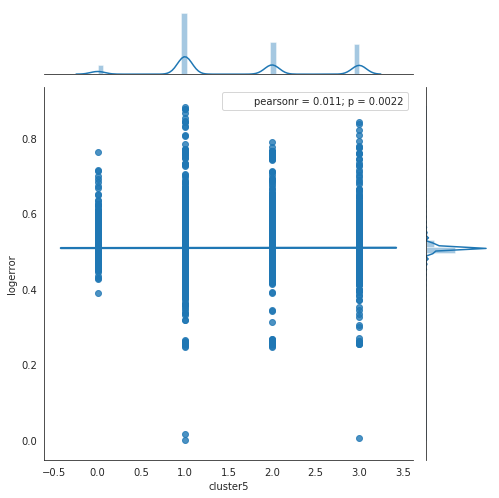

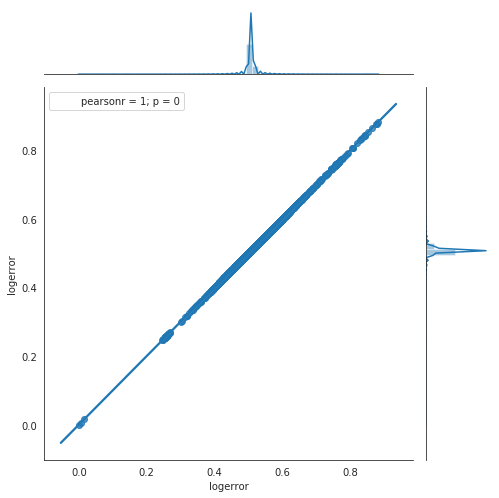

In [155]:
for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
                         'latitude', 'longitude', 'taxvaluedollarcnt',
                         'taxamount',  'fips_6037.0', 'fips_6059.0',
                         'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5',
                         'logerror']):
    with sns.axes_style('white'):
            plot_number = i + 1
#             series = df_fixed[col]
            j = sns.jointplot(train[col], 'logerror', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

In [178]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'bathroomcnt': (0.040165786447859717, 8.853300933342516e-29),
 'bedroomcnt': (0.03871036325610761, 7.565108515854162e-27),
 'calculatedfinishedsquarefeet': (0.04567594971059305, 9.896688267293576e-37),
 'latitude': (-0.009673652656373313, 0.007365947891083935),
 'longitude': (0.01588403751389915, 1.0803740057851819e-05),
 'taxvaluedollarcnt': (0.006655187383333042, 0.06523832930390591),
 'taxamount': (-0.002800621660547658, 0.43785424288995967),
 'fips_6037.0': (-0.014900275757935805, 3.661532983876367e-05),
 'fips_6059.0': (0.015717303322756088, 1.3353455844853008e-05),
 'fips_6111.0': (0.0005184053469945344, 0.8858106705231253),
 'age': (-0.026341653497733316, 2.913049991820905e-13),
 'cluster': (0.23627819633652108, 0.0),
 'cluster2': (0.00899405221608148, 0.01271845299830644),
 'cluster3': (-0.008440613080621195, 0.01937499828967688),
 'cluster4': (0.02775417224310452, 1.4729286301522482e-14),
 'cluster5': (0.01106257700634668, 0.0021794869412151167)}

In [179]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

#this is just like the regression print out / descriptive statistics thing in EXCEL

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     336.0
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:14:09   Log-Likelihood:             2.0177e+05
No. Observations:               76741   AIC:                        -4.035e+05
Df Residuals:                   76725   BIC:                        -4.034e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                      0.0011      0.001      1.405      0.160      -0.000       0.003
bedroomcnt                       0.0023      0.001      3.981      0.000       0.001       0.003
calculatedfinishedsquarefeet     0.0053      0.002      3.262      0.001       0.002       0.009
latitude                        -0.0003      0.001     -0.663      0.507      -0.001       0.001
longitude                        0.0043      0.001      5.485      0.000       0.003       0.006
taxvaluedollarcnt                0.0707      0.010      6.814      0.000       0.050       0.091
taxamount                       -0.0954      0.010     -9.824      0.000      -0.114      -0.076
fips_6037.0                      0.5036      0.001    420.288      0.000       0.501       0.506
fips_6059.0                      0.5026      0.001    400.941      0.000       0.500       0.505
fips_6111.0                      0.5043      0.001    446.755      0.000       0.502       0.506
age                             -0.0025      0.001     -4.784      0.000      -0.004      -0.001
cluster                          0.0083      0.000     68.252      0.000       0.008       0.009
cluster2                        -0.0003      0.000     -1.753      0.080      -0.001    4.07e-05
cluster3                         0.0005      0.001      0.913      0.361      -0.001       0.001
cluster4                         0.0002      0.000      0.562      0.574      -0.001       0.001
cluster5                         0.0004   9.95e-05      4.482      0.000       0.000       0.001
==============================================================================
Omnibus:                    33088.162   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58346686.852
Skew:                           0.344   Prob(JB):                         0.00
Kurtosis:                     138.081   Cond. No.                         718.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""